In [1]:
import pandas as pd
import numpy as np
import warnings 
import pickle as pkl
warnings.filterwarnings(action="ignore")

In [2]:
from pathlib import Path
import os
main_video_path = Path("../../SCVD/videos")
all_video_path = list(main_video_path.glob(r"*/*.mp4"))
all_video_path.extend(main_video_path.glob(r"*/*.mov"))
Video_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],all_video_path))

In [3]:
Video_Path_Series = pd.Series(all_video_path,name="Video").astype(str)
Video_Labels_Series = pd.Series(Video_Labels,name="CATEGORY")

In [4]:
pd_Main_Data = pd.concat([Video_Path_Series,Video_Labels_Series],axis=1)

In [5]:
pd_Main_Data.head()

,Video,CATEGORY
0,..\..\SCVD\videos\Non-Violence Videos\nv10.mp4,Non-Violence Videos
1,..\..\SCVD\videos\Non-Violence Videos\nv108.mp4,Non-Violence Videos
2,..\..\SCVD\videos\Non-Violence Videos\nv109.mp4,Non-Violence Videos
3,..\..\SCVD\videos\Non-Violence Videos\nv11.mp4,Non-Violence Videos
4,..\..\SCVD\videos\Non-Violence Videos\nv110.mp4,Non-Violence Videos


<AxesSubplot: >

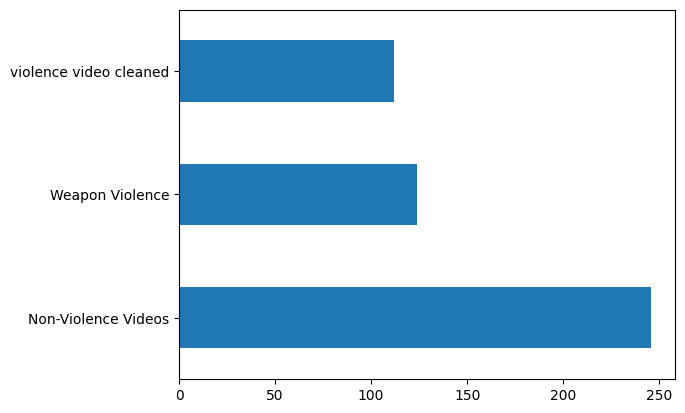

In [6]:
pd_Main_Data["CATEGORY"].value_counts().plot(kind="barh")

In [7]:
pd_Main_Data["CATEGORY"].unique()

array(['Non-Violence Videos', 'violence video cleaned', 'Weapon Violence'],
      dtype=object)

In [8]:
Non_Violence_Data = pd_Main_Data[pd_Main_Data["CATEGORY"]=="Non-Violence Videos"]
Violence_Data = pd_Main_Data[pd_Main_Data["CATEGORY"]=="violence video cleaned"]
Weapon_Data = pd_Main_Data[pd_Main_Data["CATEGORY"]=="Weapon Violence"]

In [9]:
Non_Violence_Data["Video"]

0       ..\..\SCVD\videos\Non-Violence Videos\nv10.mp4
1      ..\..\SCVD\videos\Non-Violence Videos\nv108.mp4
2      ..\..\SCVD\videos\Non-Violence Videos\nv109.mp4
3       ..\..\SCVD\videos\Non-Violence Videos\nv11.mp4
4      ..\..\SCVD\videos\Non-Violence Videos\nv110.mp4
                            ...                       
477     ..\..\SCVD\videos\Non-Violence Videos\nv82.mov
478     ..\..\SCVD\videos\Non-Violence Videos\nv83.mov
479     ..\..\SCVD\videos\Non-Violence Videos\nv84.mov
480     ..\..\SCVD\videos\Non-Violence Videos\nv85.mov
481     ..\..\SCVD\videos\Non-Violence Videos\nv99.mov
Name: Video, Length: 246, dtype: object

In [10]:
import cv2 as cv
import math


In [11]:
violence_frame_list = []

for file_video in Violence_Data["Video"]:
    Video_File_Path = file_video
    
    Video_Caption = cv.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv.resize(frame,(64,64))
            violence_frame_list.append(Frame_Resize)
            
            
    Video_Caption.release()

In [12]:
weapon_frame_list = []

for file_video in Weapon_Data["Video"]:
    Video_File_Path = file_video
    
    Video_Caption = cv.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        # print(f"{Current_Frame_ID=}")
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv.resize(frame,(64,64))
            weapon_frame_list.append(Frame_Resize)
            
            
    Video_Caption.release()

In [13]:
nv_frame_list = []

for file_video in Non_Violence_Data["Video"]:
    Video_File_Path = file_video
    
    Video_Caption = cv.VideoCapture(Video_File_Path)
    Frame_Rate = Video_Caption.get(5)
    
    while Video_Caption.isOpened():
        
        Current_Frame_ID = Video_Caption.get(1)
        
        ret,frame = Video_Caption.read()
        
        if ret != True:
            break
            
        if Current_Frame_ID % math.floor(Frame_Rate) == 0:
            Frame_Resize = cv.resize(frame,(64,64))
            nv_frame_list.append(Frame_Resize)
            
    Video_Caption.release()

In [14]:
len(weapon_frame_list),len(nv_frame_list),len(violence_frame_list)

(953, 1417, 1111)

Text(0, 0.5, '12288')

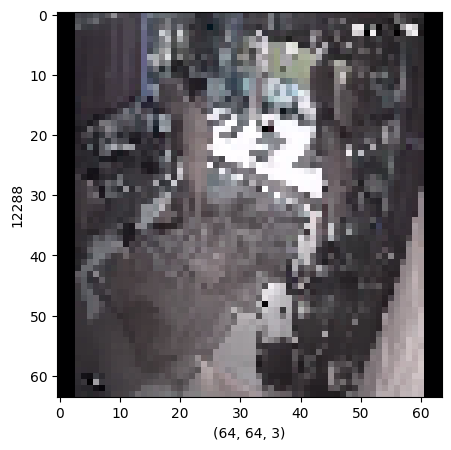

In [15]:
import matplotlib.pyplot as plt
figure = plt.figure(figsize=(5,5))
plt.imshow(violence_frame_list[32])
plt.xlabel(violence_frame_list[32].shape)
plt.ylabel(violence_frame_list[32].size)

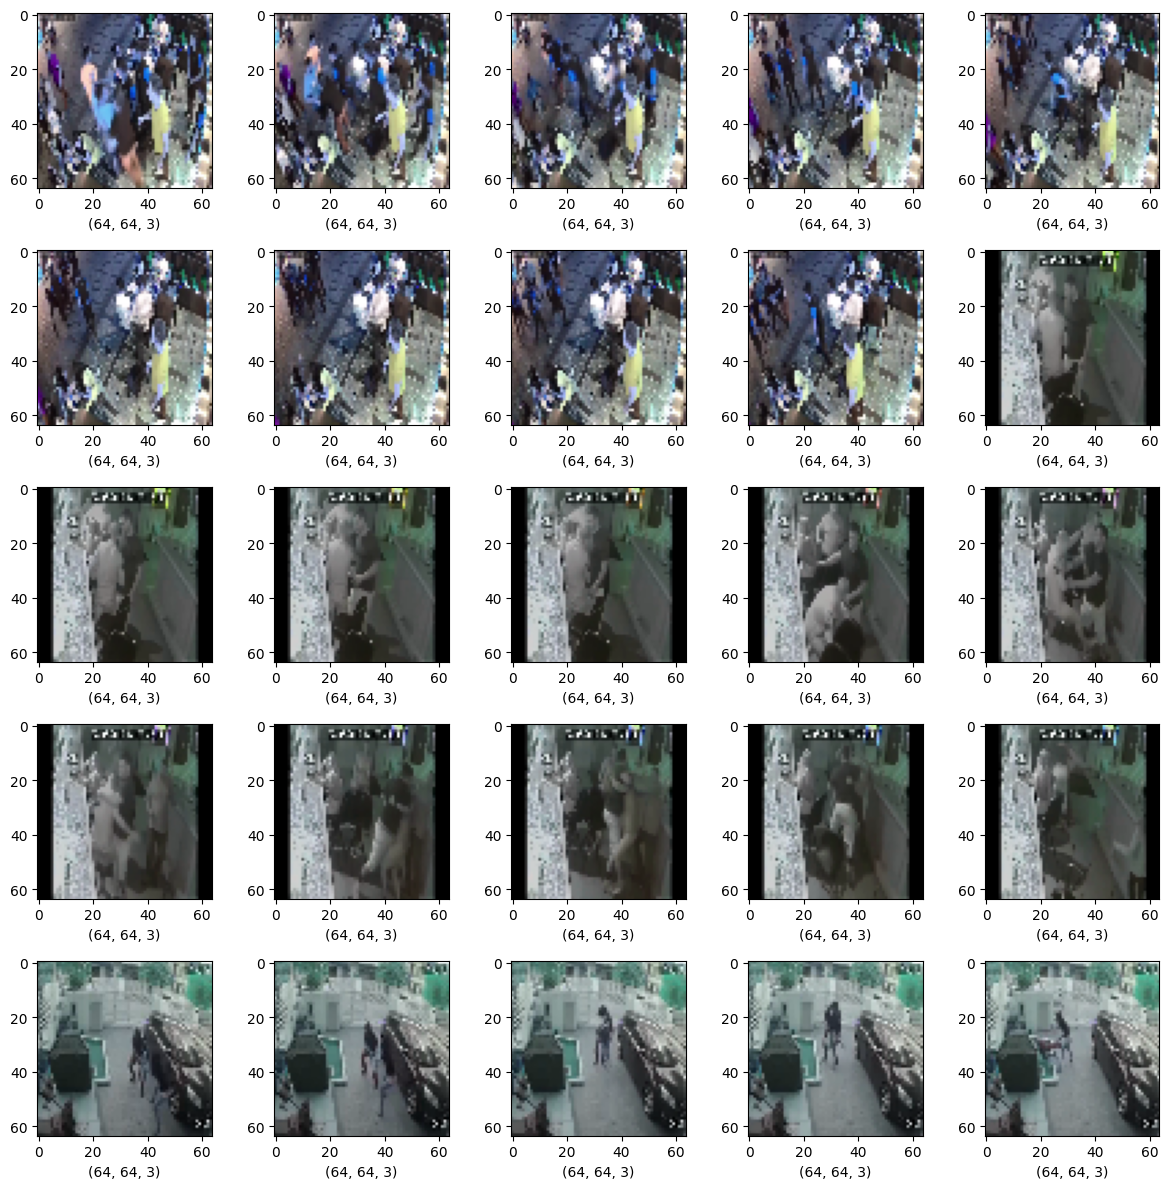

In [16]:
figure,axis = plt.subplots(5,5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    
    Img_Pick = violence_frame_list[i]
    
    ax.set_xlabel(Img_Pick.shape)
    ax.imshow(Img_Pick)

plt.tight_layout()
plt.show()

In [17]:
X_2D_Violence = np.reshape(violence_frame_list, (1111, 64*64*3))

X_2D_Violence

array([[154, 142, 149, ..., 150, 136, 140],
       [154, 142, 149, ..., 150, 136, 140],
       [142, 130, 137, ..., 146, 129, 134],
       ...,
       [  0,   0,   1, ...,   0,   0,   1],
       [  0,   0,   1, ...,   0,   0,   1],
       [  0,   0,   1, ...,   0,   0,   1]], dtype=uint8)

In [18]:
X_2D_Ones_Violence = np.concatenate((X_2D_Violence,np.ones((1111,1))), axis = 1)
print(np.shape(X_2D_Ones_Violence))

(1111, 12289)


In [19]:
X_2D_Ones_Violence

array([[154., 142., 149., ..., 136., 140.,   1.],
       [154., 142., 149., ..., 136., 140.,   1.],
       [142., 130., 137., ..., 129., 134.,   1.],
       ...,
       [  0.,   0.,   1., ...,   0.,   1.,   1.],
       [  0.,   0.,   1., ...,   0.,   1.,   1.],
       [  0.,   0.,   1., ...,   0.,   1.,   1.]])

In [20]:
X_4D_Violence = np.asarray(violence_frame_list)
print(np.shape(X_4D_Violence))

(1111, 64, 64, 3)


In [21]:
X_2D_Non_Violence = np.reshape(nv_frame_list, (len(nv_frame_list), 64*64*3))
X_2D_Zeros_Non_Violence = np.concatenate((X_2D_Non_Violence,np.zeros((len(nv_frame_list),1))), axis = 1)
print(np.shape(X_2D_Zeros_Non_Violence))
X_4D_Non_Violence = np.asarray(nv_frame_list)
print(np.shape(X_4D_Non_Violence))

(1417, 12289)
(1417, 64, 64, 3)


In [22]:
X_2D_Weapon_Violence = np.reshape(weapon_frame_list, (len(weapon_frame_list), 64*64*3))
X_2D_two_Weapon_Violence = np.concatenate((X_2D_Weapon_Violence,np.ones((len(weapon_frame_list),1))*2), axis = 1)
print(np.shape(X_2D_two_Weapon_Violence))
X_4D_Weapon_Violence = np.asarray(weapon_frame_list)
print(np.shape(X_4D_Weapon_Violence))

(953, 12289)
(953, 64, 64, 3)


In [23]:
X = np.concatenate((X_2D_Ones_Violence,X_2D_Zeros_Non_Violence,X_2D_two_Weapon_Violence),axis=0)
np.shape(X)


(3481, 12289)

In [24]:
np.random.shuffle(X)

In [25]:
X = X.astype(int)


In [26]:
Y = X[:,-1]
X = np.delete(X,-1,1)

In [27]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(X,Y,train_size=0.9,random_state=42,shuffle=True)
print(f"{xTrain.shape=}")
print(f"{yTrain.shape=}")
print(f"{xTest.shape=}")
print(f"{yTest.shape=}")

xTrain.shape=(3132, 12288)
yTrain.shape=(3132,)
xTest.shape=(349, 12288)
yTest.shape=(349,)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)


In [29]:
dtree_pre = cartc.predict(xTest)
rf_pre = rfc.predict(xTest)
gbmc_pre = gbmc.predict(xTest)
xgbc_pre =xgbc.predict(xTest)

In [30]:
from sklearn.metrics import accuracy_score
dtree_acc = accuracy_score(yTest,dtree_pre)
rf_acc = accuracy_score(yTest,rf_pre)
gbmc_acc = accuracy_score(yTest,gbmc_pre)
xgbc_acc = accuracy_score(yTest,xgbc_pre)

dtree_acc,rf_acc,gbmc_acc,xgbc_acc

(0.9025787965616046, 0.9885386819484241, 0.9914040114613181, 0.994269340974212)

<BarContainer object of 4 artists>

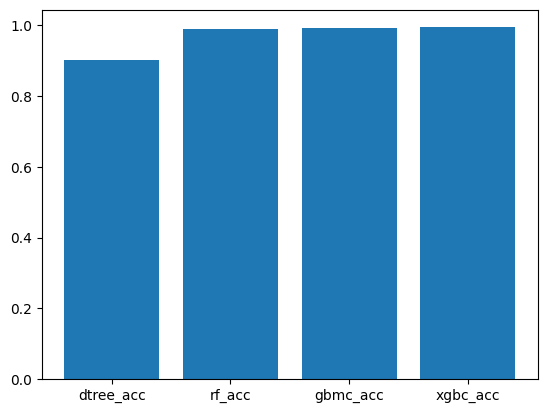

In [31]:
plt.bar(x=["dtree_acc","rf_acc","gbmc_acc","xgbc_acc"],height=[dtree_acc,rf_acc,gbmc_acc,xgbc_acc])

In [32]:
# pkl.dump(xgbc, open('xgmodel.pkl', 'wb'))